In [1]:
!wget -q https://www.dropbox.com/scl/fi/3p82v6b4n17x8vy1d3qx9/2025clock.zip?rlkey=ieleolj3up1kon5pm0y4h5dek -O 2025clock.zip
!unzip -q 2025clock.zip
!rm 2025clock.zip
!ls 2025clock

replace clock_05.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ls: cannot access '2025clock': No such file or directory


clock_01.png  clock_03.png  clock_05.png  sample_data
clock_02.png  clock_04.png  __MACOSX


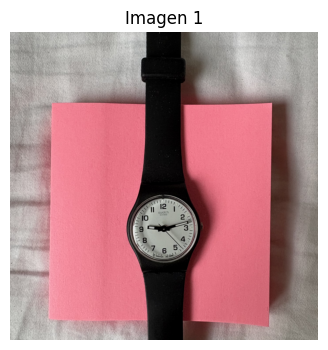

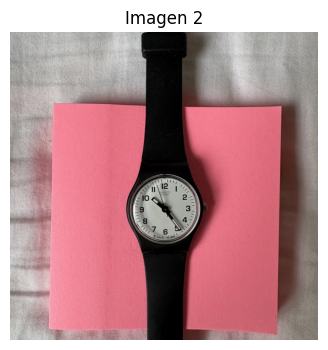

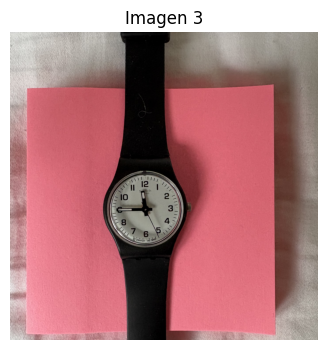

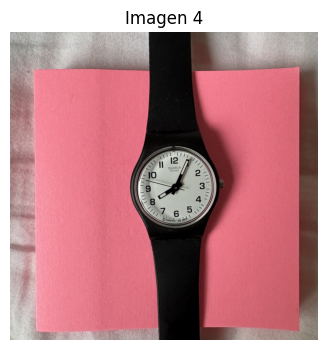

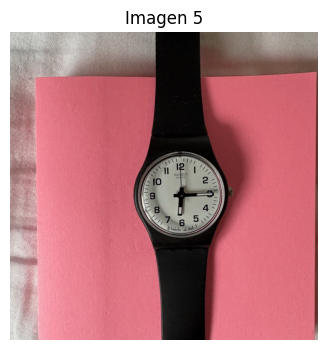

In [2]:
!ls
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mostrar las 5 imágenes
for i in range(1,6):
    path = f"clock_0{i}.png"   # nombres según lo que viste al descomprimir
    X = mpimg.imread(path)
    plt.figure(figsize=(4,4))
    plt.imshow(X)
    plt.axis('off')
    plt.title(f"Imagen {i}")
    plt.show()

Imagen 1 size =  (1400, 1400)


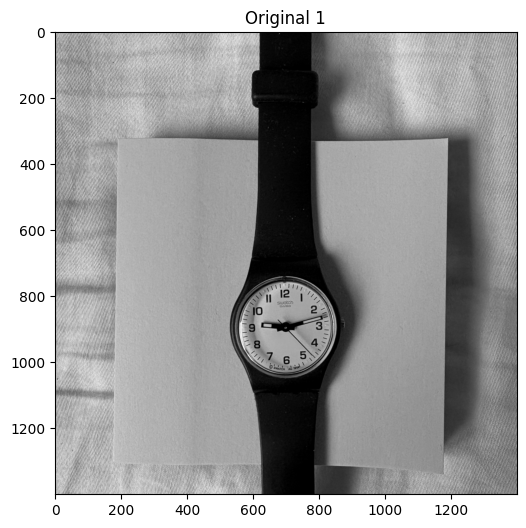

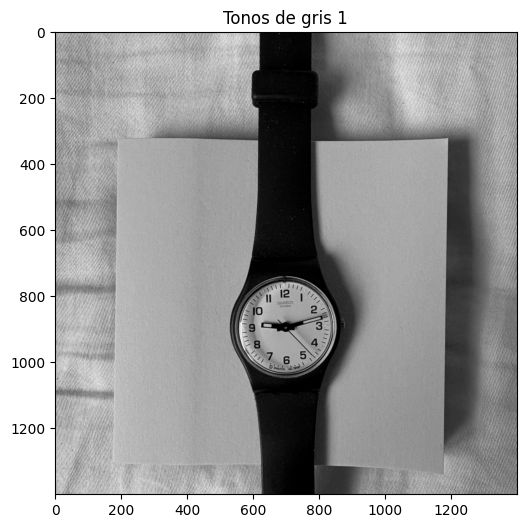

Imagen 2 size =  (1400, 1400)


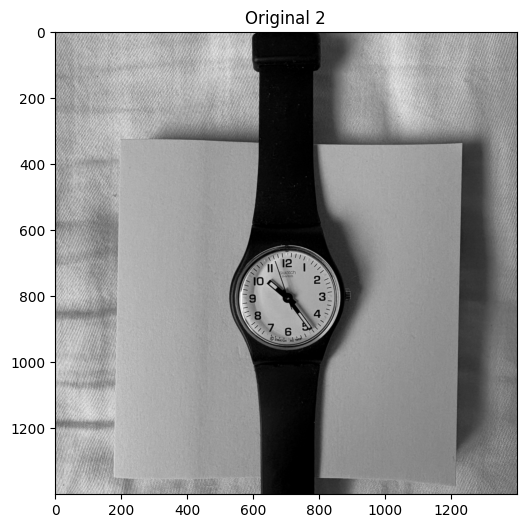

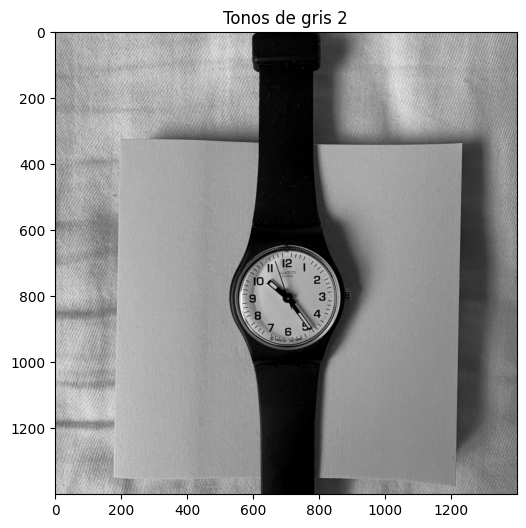

Imagen 3 size =  (1400, 1400)


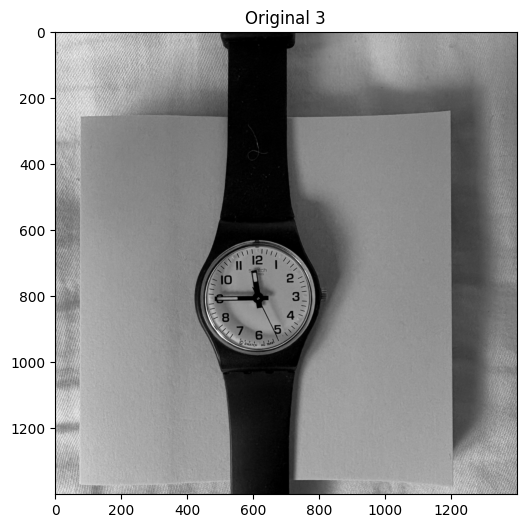

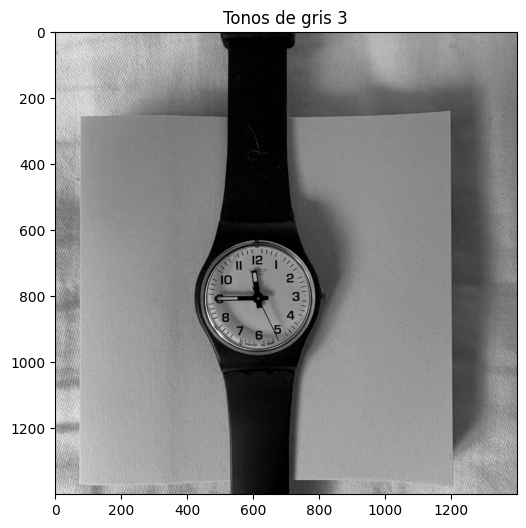

Imagen 4 size =  (1400, 1400)


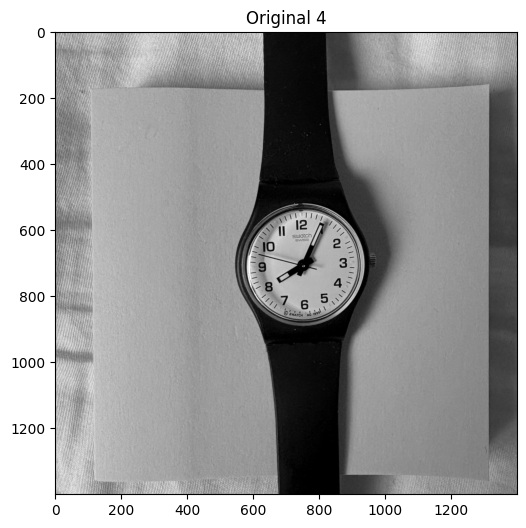

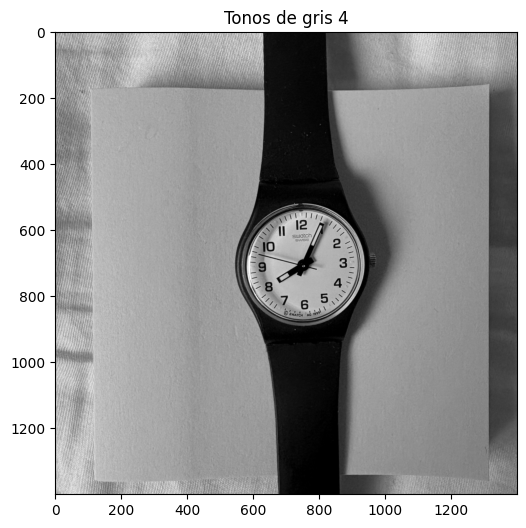

Imagen 5 size =  (1400, 1400)


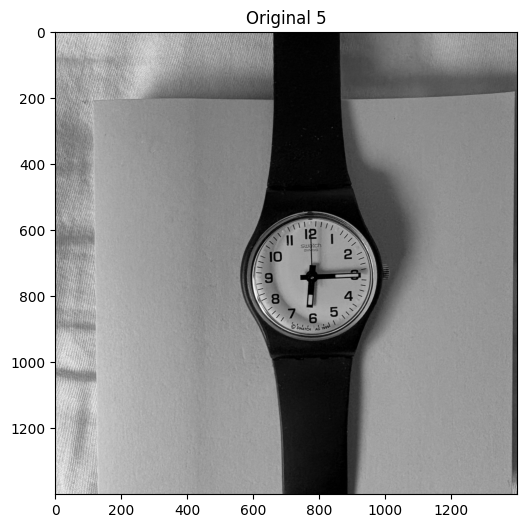

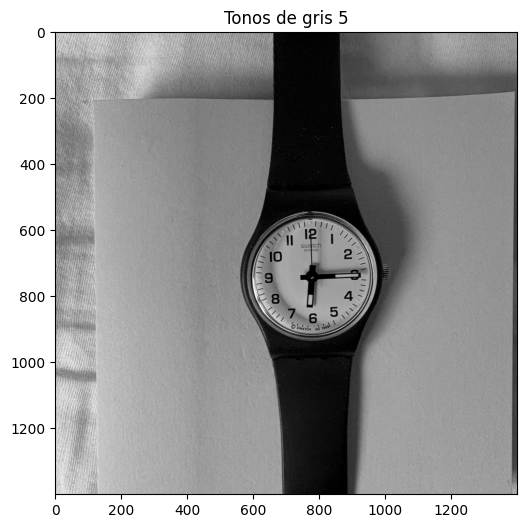

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# ---- Programa principal: tonos de gris ----
for i in range(1,6):
    path = f"clock_0{i}.png"

    # Leer la imagen
    X = imread(path)  # float 0-1
    if X.ndim == 3:
        X = X.mean(axis=2)  # pasar a gris
    X = (X * 255).astype(np.uint8)

    print(f'Imagen {i} size = ', X.shape)

    # Mostrar imagen original
    plt.figure(figsize=(6,6))
    plt.imshow(X,cmap='gray')
    plt.title(f'Original {i}')
    plt.show()

    # Normalización a 0-255
    Xf = X.astype(float)
    X_gray = 255 * ((Xf - Xf.min()) / (Xf.max() - Xf.min()))
    X_gray = X_gray.astype(np.uint8)

    plt.figure(figsize=(6,6))
    plt.imshow(X_gray,cmap='gray')
    plt.title(f'Tonos de gris {i}')
    plt.show()


Imagen 1 size =  (1400, 1400)


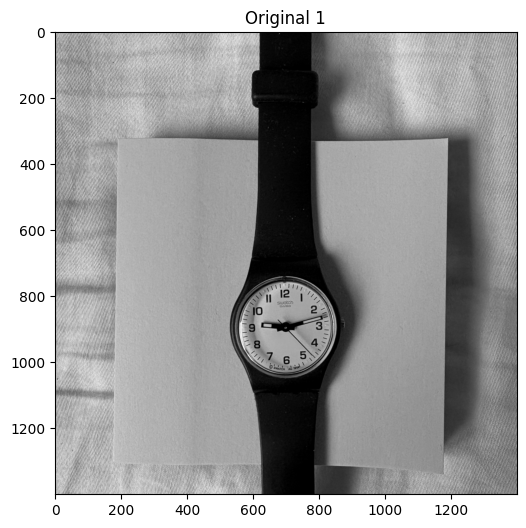

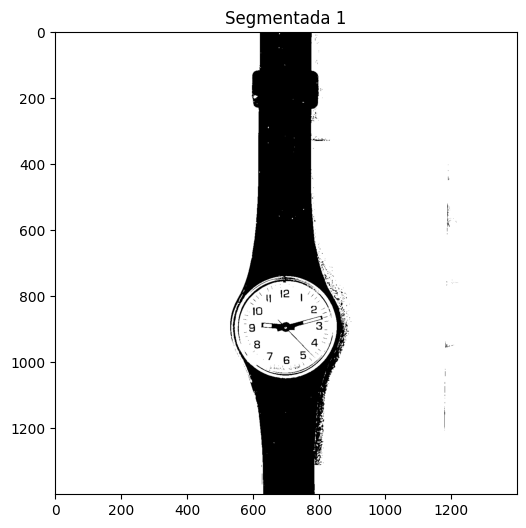

Imagen 2 size =  (1400, 1400)


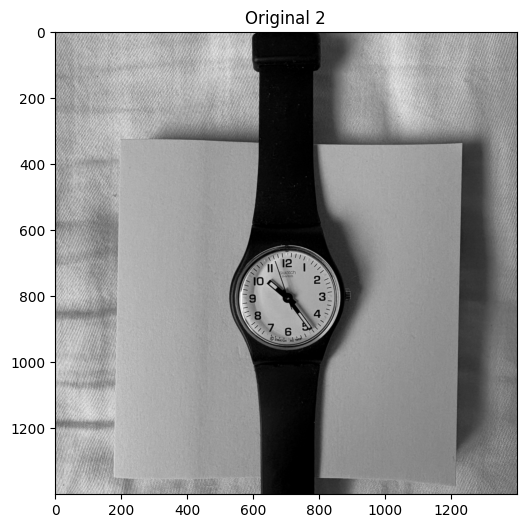

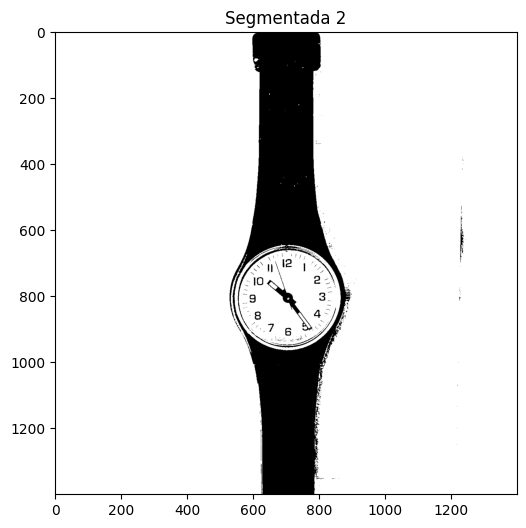

Imagen 3 size =  (1400, 1400)


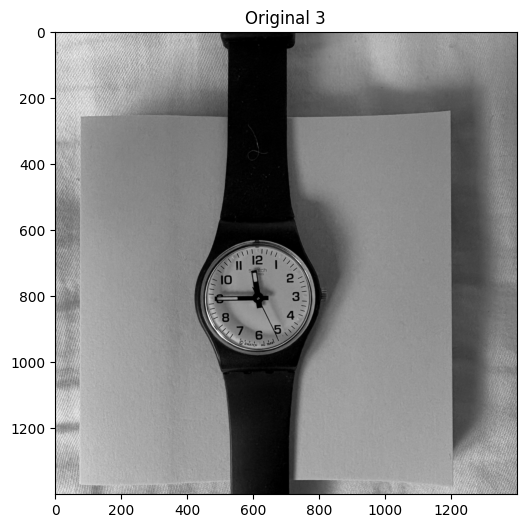

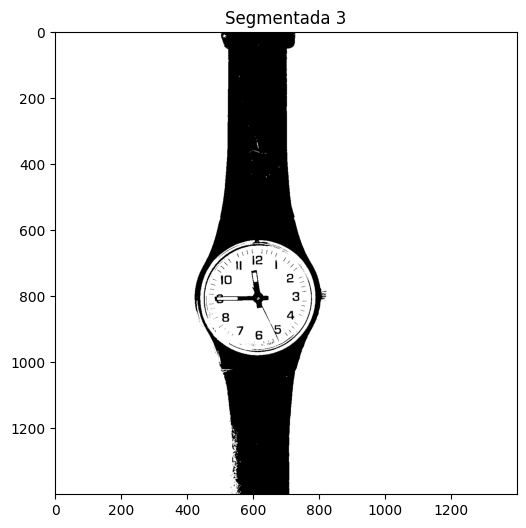

Imagen 4 size =  (1400, 1400)


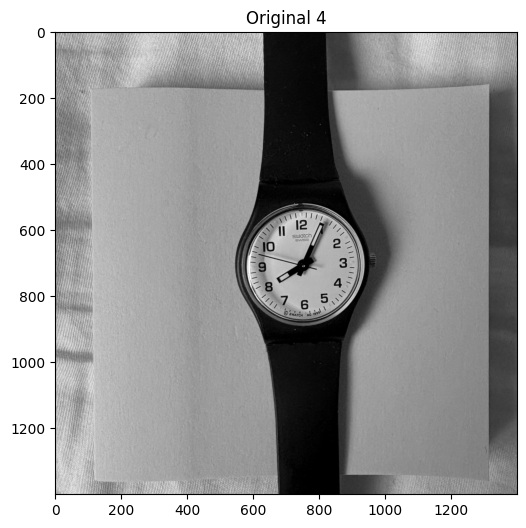

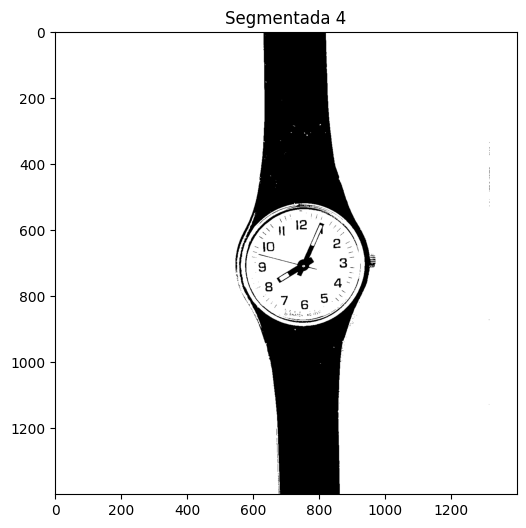

Imagen 5 size =  (1400, 1400)


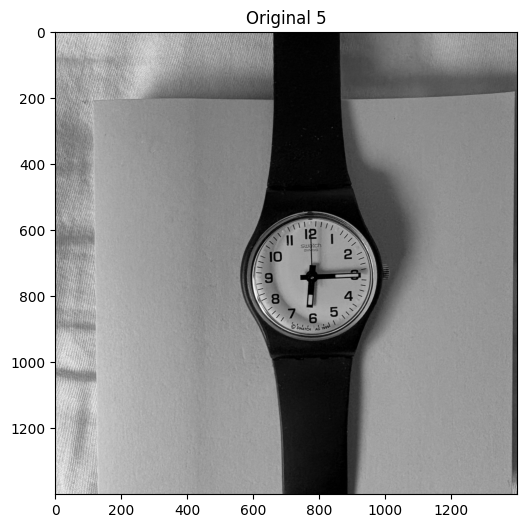

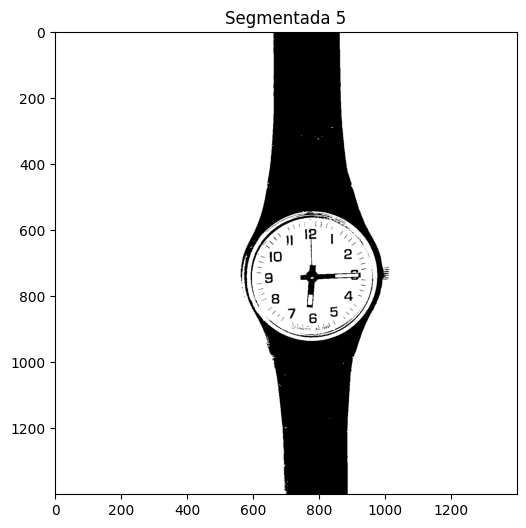

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# ---- Programa principal: segmentación binaria ----
for i in range(1,6):
    path = f"clock_0{i}.png"

    # Leer la imagen
    X = imread(path)  # float 0-1
    if X.ndim == 3:
        X = X.mean(axis=2)  # pasar a gris
    X = (X * 255).astype(np.uint8)

    print(f'Imagen {i} size = ', X.shape)

    # Mostrar imagen original
    plt.figure(figsize=(6,6))
    plt.imshow(X,cmap='gray')
    plt.title(f'Original {i}')
    plt.show()

    # Segmentación binaria
    umbral = 40
    X_seg = np.zeros(X.shape, np.uint8)
    (N,M) = X.shape
    for r in range(N):
        for c in range(M):
            if X[r,c] < umbral:
                X_seg[r,c] = 0
            else:
                X_seg[r,c] = 255

    plt.figure(figsize=(6,6))
    plt.imshow(X_seg,cmap='gray')
    plt.title(f'Segmentada {i}')
    plt.show()


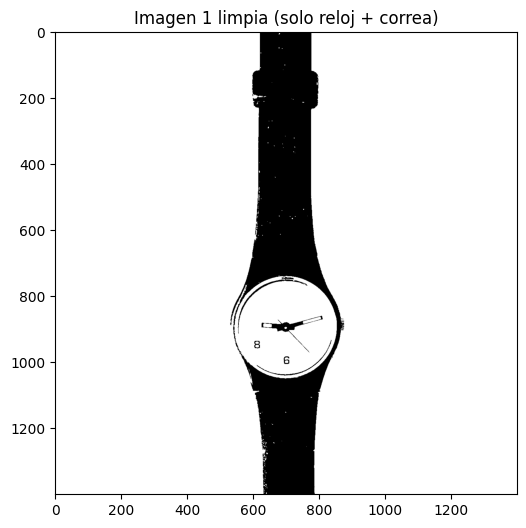

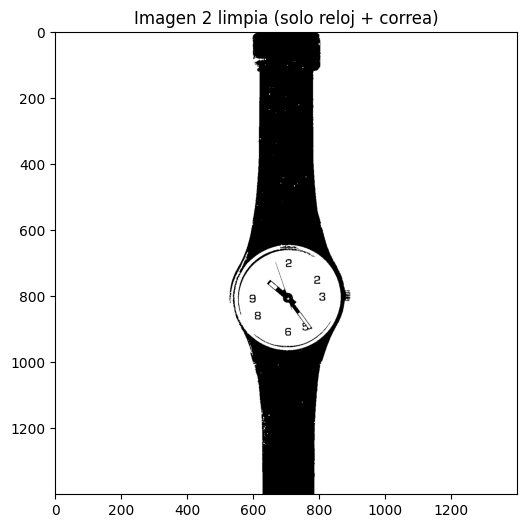

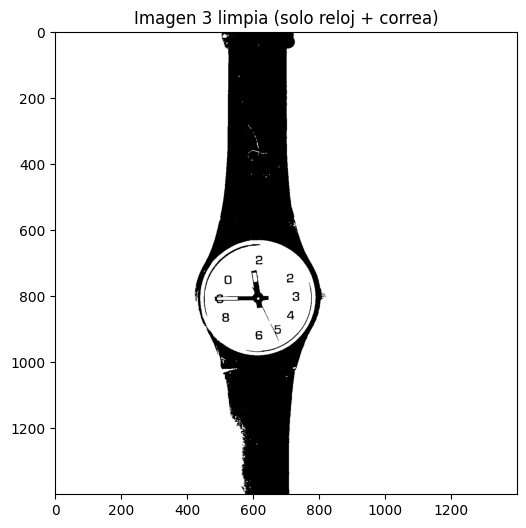

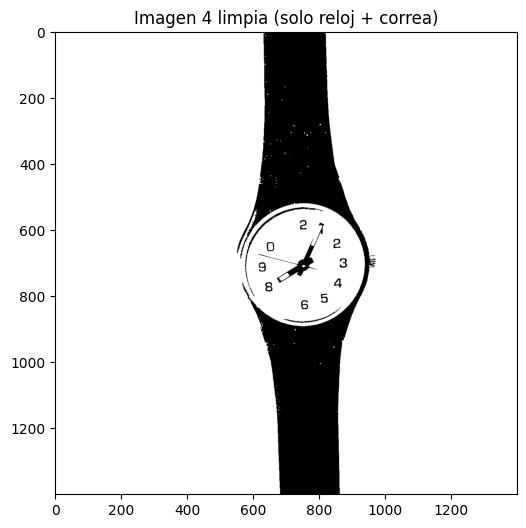

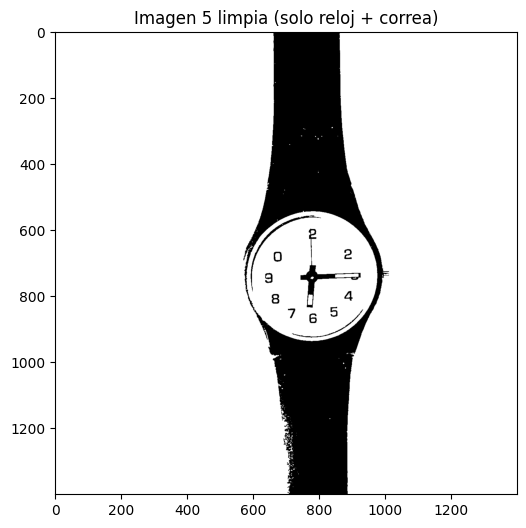

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Función para limpiar píxeles remanentes y dejar solo objetos grandes (reloj + correa)
def limpiar_reloj(X_seg, min_pixeles=200):
    N, M = X_seg.shape
    X_limpia = np.ones((N,M), np.uint8)*255  # fondo blanco
    X_temp = X_seg.copy()
    etiqueta = 1
    etiquetas = np.zeros((N,M), np.int32)

    for r in range(N):
        for c in range(M):
            if X_temp[r,c]==0 and etiquetas[r,c]==0:
                queue = [(r,c)]
                etiquetas[r,c] = etiqueta
                count = 0
                while queue:
                    rr, cc = queue.pop(0)
                    count += 1
                    for dr in [-1,0,1]:
                        for dc in [-1,0,1]:
                            nr = rr+dr
                            nc = cc+dc
                            if 0<=nr<N and 0<=nc<M:
                                if X_temp[nr,nc]==0 and etiquetas[nr,nc]==0:
                                    etiquetas[nr,nc] = etiqueta
                                    queue.append((nr,nc))
                if count >= min_pixeles:
                    X_limpia[etiquetas==etiqueta] = 0
                etiqueta += 1
    return X_limpia

# ---- Programa principal: limpieza y guardar ----
X_limpias = []  # lista para guardar todas las imágenes limpias

for i in range(1,6):
    path = f"clock_0{i}.png"

    # Leer la imagen segmentada
    X = imread(path)
    if X.ndim == 3:
        X = X.mean(axis=2)
    X = (X * 255).astype(np.uint8)

    # Segmentación binaria (umbral 30)
    X_seg = np.zeros(X.shape, np.uint8)
    (N,M) = X.shape
    for r in range(N):
        for c in range(M):
            if X[r,c] < 30:
                X_seg[r,c] = 0
            else:
                X_seg[r,c] = 255

    # Limpieza
    X_limpia = limpiar_reloj(X_seg, min_pixeles=200)

    # Guardar imagen limpia
    X_limpias.append(X_limpia)

    # Mostrar la imagen limpia
    plt.figure(figsize=(6,6))
    plt.imshow(X_limpia, cmap='gray')
    plt.title(f'Imagen {i} limpia (solo reloj + correa)')
    plt.show()

# Ahora X_limpias[0] a X_limpias[4] contienen todas las imágenes limpias

Imagen 1 - Centro del reloj: (i,j) = (873,701)


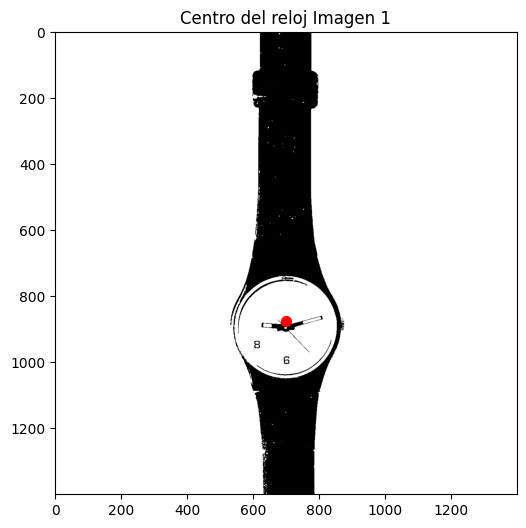

Imagen 2 - Centro del reloj: (i,j) = (789,704)


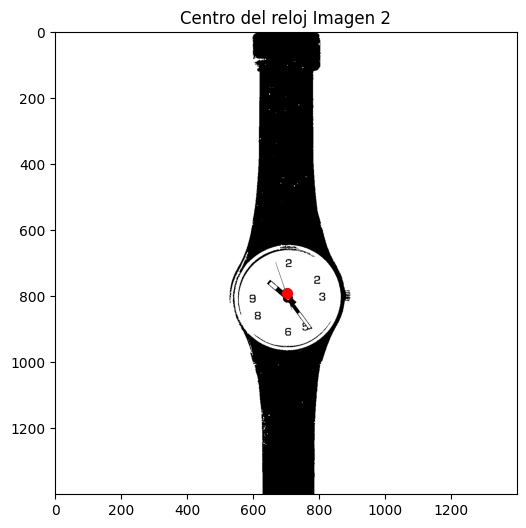

Imagen 3 - Centro del reloj: (i,j) = (802,620)


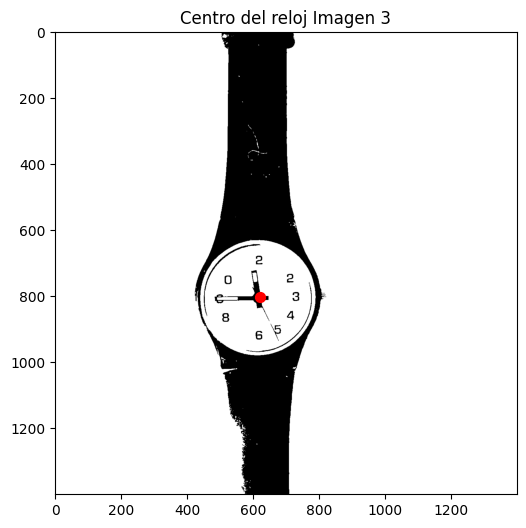

Imagen 4 - Centro del reloj: (i,j) = (694,750)


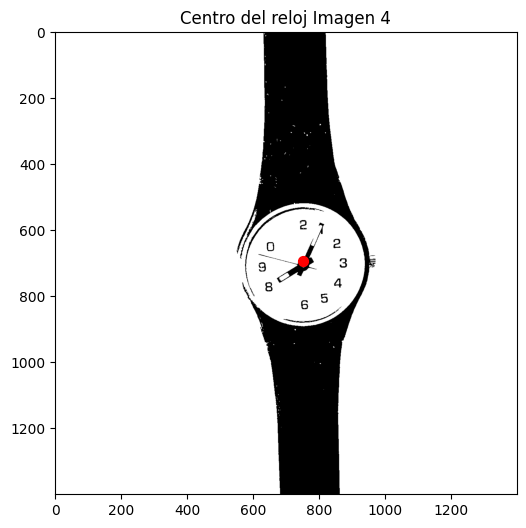

Imagen 5 - Centro del reloj: (i,j) = (725,778)


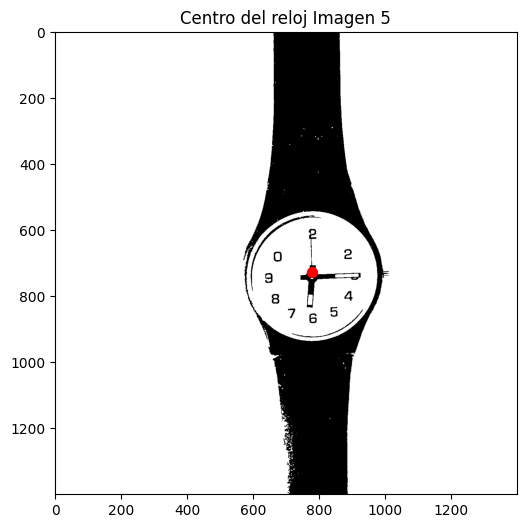

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Programa principal: cálculo del centro para las 5 imágenes ----
for i, X_limpia in enumerate(X_limpias, start=1):  # X_limpias contiene las 5 imágenes
    (N, M) = X_limpia.shape

    # Obtener coordenadas de píxeles negros
    filas_neg, cols_neg = np.where(X_limpia == 0)

    # Centro horizontal: mediana de columnas
    j_centro = int(np.median(cols_neg))

    # Centro vertical: fila del píxel negro más alejado horizontalmente del centro
    distancias_horiz = np.abs(cols_neg - j_centro)
    idx_max = np.argmax(distancias_horiz)
    i_centro = filas_neg[idx_max]

    print(f'Imagen {i} - Centro del reloj: (i,j) = ({i_centro},{j_centro})')

    # Mostrar el centro sobre la imagen limpia
    plt.figure(figsize=(6,6))
    plt.imshow(X_limpia, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50)
    plt.title(f'Centro del reloj Imagen {i}')
    plt.show()

Imagen 1 - Radio detectado: 134


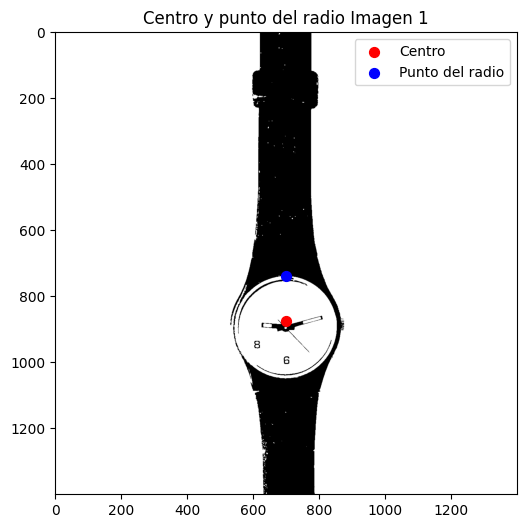

Imagen 2 - Radio detectado: 144


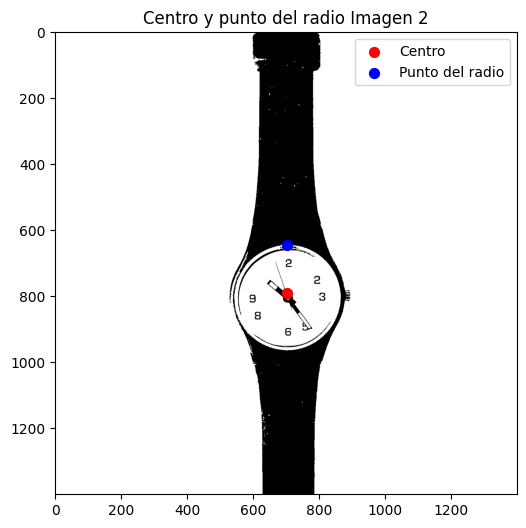

Imagen 3 - Radio detectado: 170


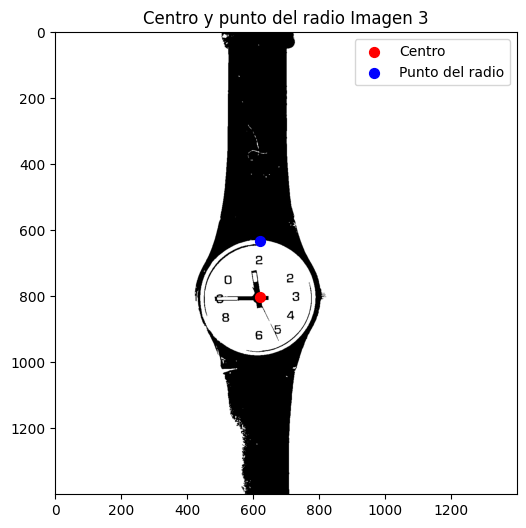

Imagen 4 - Radio detectado: 158


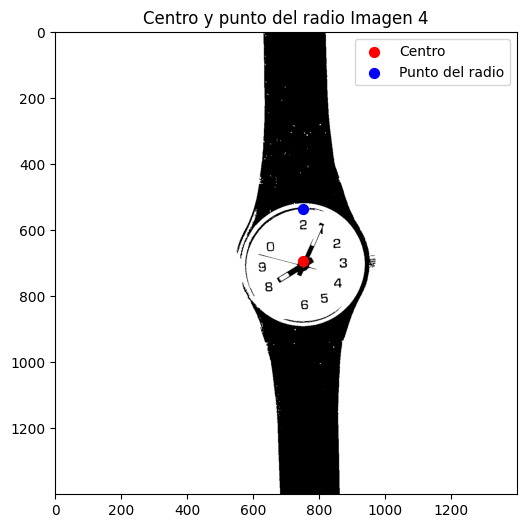

Imagen 5 - Radio detectado: 164


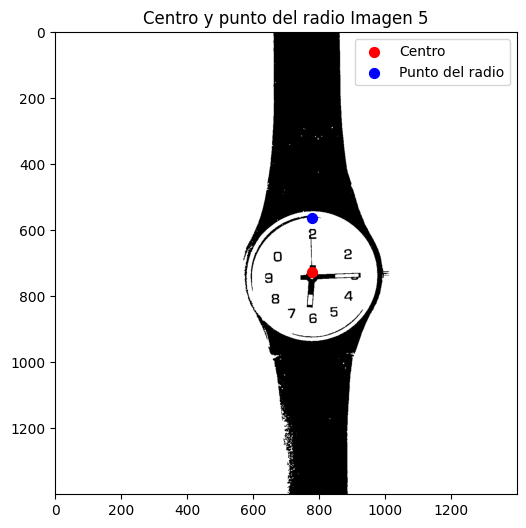

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Programa principal: calcular radio desde el centro verticalmente para 5 imágenes ----
for i, X_limpia in enumerate(X_limpias, start=1):
    (N, M) = X_limpia.shape

    # Centro ya calculado previamente (puedes guardarlos en listas si quieres reutilizar)
    # i_centro, j_centro
    # Aquí los volvemos a calcular rápido
    filas_neg, cols_neg = np.where(X_limpia == 0)
    j_centro = int(np.median(cols_neg))
    distancias_horiz = np.abs(cols_neg - j_centro)
    idx_max = np.argmax(distancias_horiz)
    i_centro = filas_neg[idx_max]

    # Recorrer verticalmente hacia arriba desde el centro
    umbral_pixeles_negros = 200  # número de píxeles negros que indica la correa
    radio = 0
    for r in range(i_centro-1, 0, -1):
        negros = np.sum(X_limpia[r, :] == 0)
        if negros >= umbral_pixeles_negros:
            radio = i_centro - r  # distancia desde el centro hasta donde empieza la correa
            break

    print(f'Imagen {i} - Radio detectado: {radio}')

    # Coordenadas del punto en la circunferencia (vertical hacia arriba)
    punto_radio_r = i_centro - radio
    punto_radio_c = j_centro

    # Mostrar imagen con centro y punto del radio
    plt.figure(figsize=(6,6))
    plt.imshow(X_limpia, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50, label='Centro')
    plt.scatter([punto_radio_c], [punto_radio_r], c='blue', s=50, label='Punto del radio')
    plt.title(f'Centro y punto del radio Imagen {i}')
    plt.legend()
    plt.show()

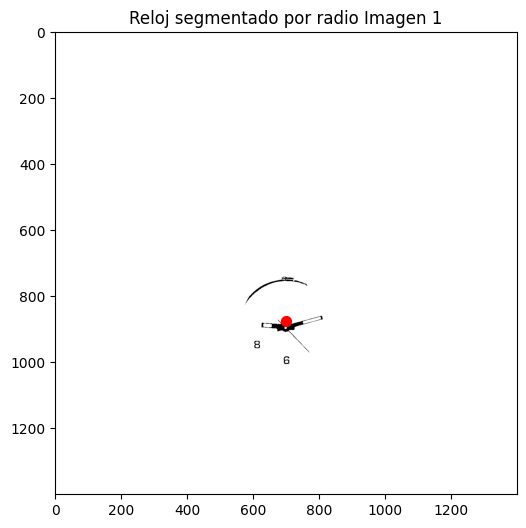

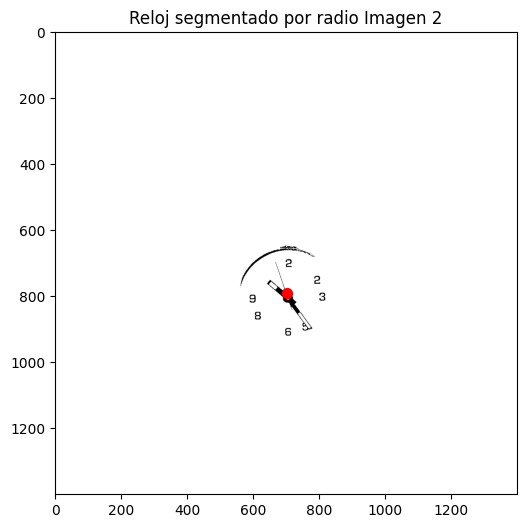

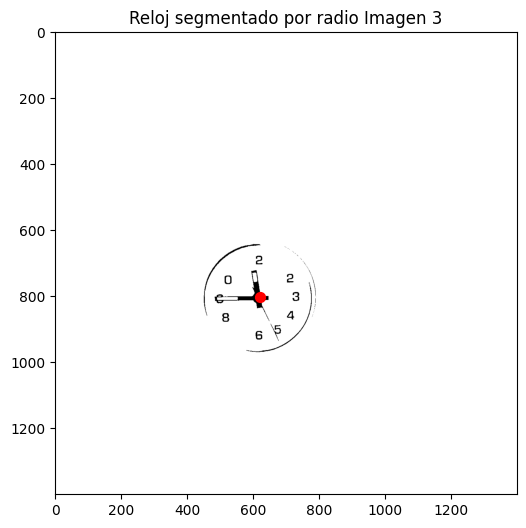

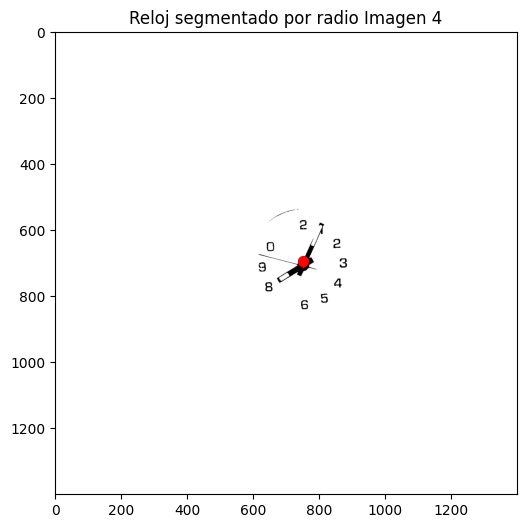

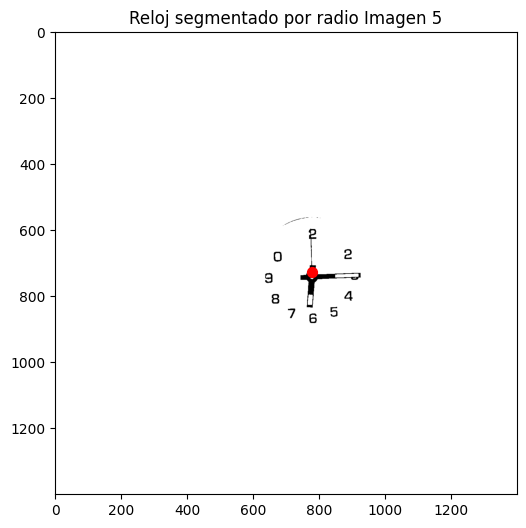

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Programa principal: eliminar píxeles fuera del radio para 5 imágenes ----
for i, X_limpia in enumerate(X_limpias, start=1):
    (N, M) = X_limpia.shape

    # Centro ya calculado previamente
    filas_neg, cols_neg = np.where(X_limpia == 0)
    j_centro = int(np.median(cols_neg))
    distancias_horiz = np.abs(cols_neg - j_centro)
    idx_max = np.argmax(distancias_horiz)
    i_centro = filas_neg[idx_max]

    # Calcular radio vertical hacia arriba
    umbral_pixeles_negros = 200
    radio = 0
    for r in range(i_centro-1, 0, -1):
        negros = np.sum(X_limpia[r, :] == 0)
        if negros >= umbral_pixeles_negros:
            radio = i_centro - r
            break

    # Crear nueva imagen solo con el interior del reloj
    reloj_segmentado = np.ones((N,M), np.uint8)*255  # fondo blanco
    for r in range(N):
        for c in range(M):
            d = np.sqrt((r - i_centro)**2 + (c - j_centro)**2)
            if d <= radio:
                reloj_segmentado[r,c] = X_limpia[r,c]  # mantener píxeles originales dentro del radio

    # Mostrar el reloj segmentado
    plt.figure(figsize=(6,6))
    plt.imshow(reloj_segmentado, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50)  # marcar centro
    plt.title(f'Reloj segmentado por radio Imagen {i}')
    plt.show()
    # Crear lista para todos los relojes segmentados
relojes_segmentados = []

for i, X_limpia in enumerate(X_limpias, start=1):
    (N, M) = X_limpia.shape

    # ... calcular centro y radio ...

    reloj_segmentado = np.ones((N,M), np.uint8)*255
    for r in range(N):
        for c in range(M):
            d = np.sqrt((r - i_centro)**2 + (c - j_centro)**2)
            if d <= radio:
                reloj_segmentado[r,c] = X_limpia[r,c]

    relojes_segmentados.append(reloj_segmentado)

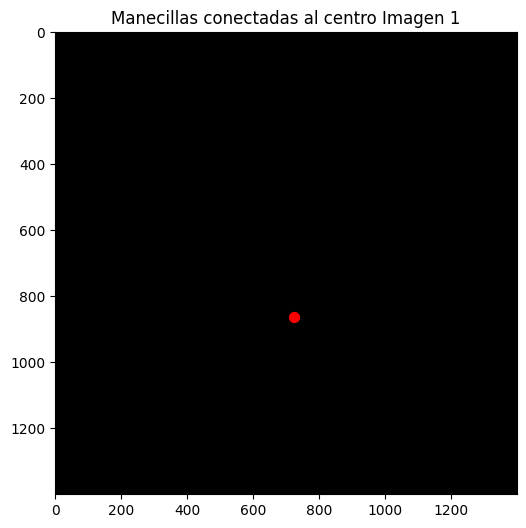

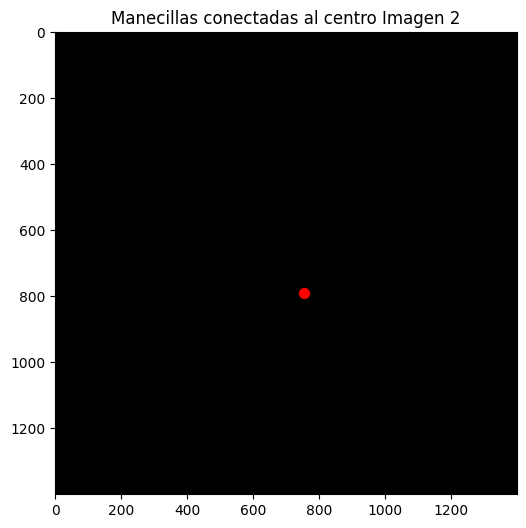

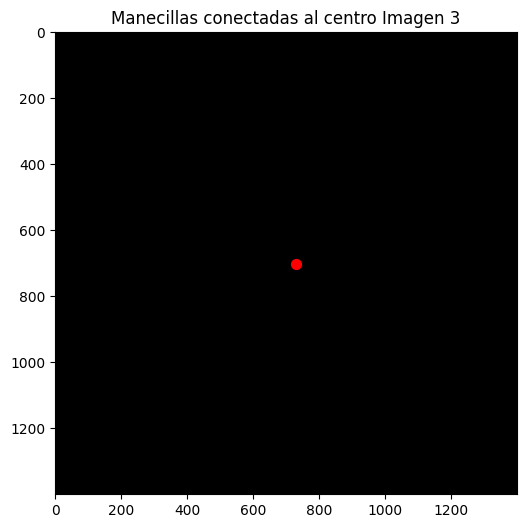

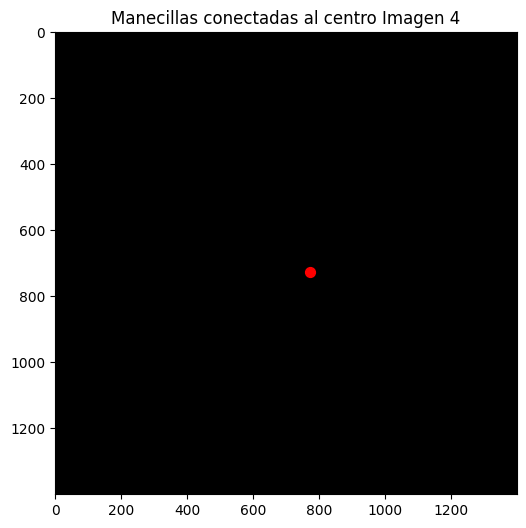

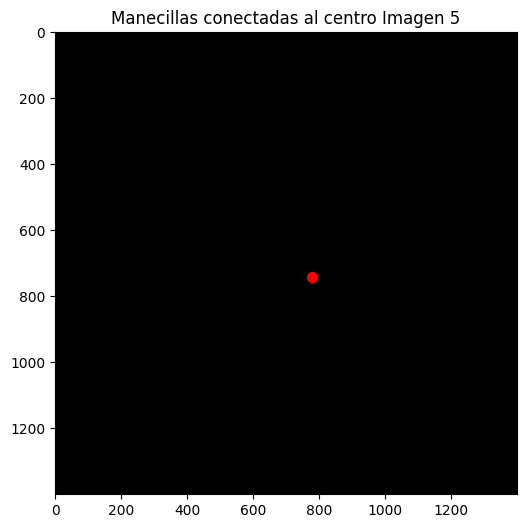

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Programa principal: mantener solo píxeles conectados al centro (manecillas) ----
manecillas_finales = []

for i, reloj in enumerate(relojes_segmentados, start=1):
    (N, M) = reloj.shape
    # Convertir a binaria (umbral 128)
    binaria = np.where(reloj < 128, 0, 255).astype(np.uint8)

    # Encontrar el centro
    filas_neg, cols_neg = np.where(binaria == 0)
    if len(filas_neg) == 0:
        print(f"Imagen {i}: no se detectaron píxeles negros")
        manecillas_finales.append(np.ones((N,M), np.uint8)*255)
        continue

    j_centro = int(np.median(cols_neg))
    distancias_horiz = np.abs(cols_neg - j_centro)
    idx_max = np.argmax(distancias_horiz)
    i_centro = filas_neg[idx_max]

    # Crear máscara final
    mascara = np.ones((N, M), np.uint8) * 255  # fondo blanco

    # Flood fill 8-conectado desde el centro
    visited = np.zeros((N, M), np.bool_)
    stack = [(i_centro, j_centro)]

    while stack:
        r, c = stack.pop()
        if 0 <= r < N and 0 <= c < M:
            if not visited[r, c] and binaria[r, c] == 0:
                visited[r, c] = True
                mascara[r, c] = 0
                # vecinos 8-conectados
                for dr in [-1,0,1]:
                    for dc in [-1,0,1]:
                        if dr != 0 or dc != 0:
                            stack.append((r+dr, c+dc))

    manecillas_finales.append(mascara)

    # Mostrar resultado
    plt.figure(figsize=(6,6))
    plt.imshow(mascara, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50, label='Centro')
    plt.title(f'Manecillas conectadas al centro Imagen {i}')
    plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

min_longitud = 20
min_grosor = 5

for i, X_limpia in enumerate(X_limpias, start=1):
    (N, M) = X_limpia.shape

    # Recalcular centro
    filas_neg, cols_neg = np.where(X_limpia == 0)
    j_centro = int(np.median(cols_neg))
    distancias_horiz = np.abs(cols_neg - j_centro)
    idx_max = np.argmax(distancias_horiz)
    i_centro = filas_neg[idx_max]

    # Flood fill desde el centro para obtener píxeles conectados
    visited = np.zeros((N,M), np.bool_)
    stack = [(i_centro, j_centro)]
    pixeles_conectados = []

    while stack:
        r, c = stack.pop()
        if 0 <= r < N and 0 <= c < M:
            if not visited[r,c] and manecillas[r,c]==0:
                visited[r,c] = True
                pixeles_conectados.append((r,c))
                stack.extend([(r-1,c),(r+1,c),(r,c-1),(r,c+1)])

    if len(pixeles_conectados) == 0:
        print(f"Imagen {i}: No hay píxeles conectados al centro.")
        continue  # saltar esta imagen

    pixeles_conectados = np.array(pixeles_conectados)

    # Crear máscara limpia
    manecillas_limpias = np.ones((N,M), np.uint8)*255

    # Separar los píxeles en “líneas radiales” usando su ángulo desde el centro
    r_rel = pixeles_conectados[:,0] - i_centro
    c_rel = pixeles_conectados[:,1] - j_centro
    angulos = np.arctan2(r_rel, c_rel)

    num_grupos = 12
    grupo_idx = ((angulos + np.pi) / (2*np.pi) * num_grupos).astype(int)

    for g in range(num_grupos):
        comp = pixeles_conectados[grupo_idx==g]
        if len(comp)==0:
            continue
        r_min, r_max = comp[:,0].min(), comp[:,0].max()
        c_min, c_max = comp[:,1].min(), comp[:,1].max()
        longitud = np.sqrt((r_max-r_min)**2 + (c_max-c_min)**2)
        grosor = min(r_max-r_min+1, c_max-c_min+1)
        if longitud >= min_longitud and grosor >= min_grosor:
            manecillas_limpias[comp[:,0], comp[:,1]] = 0

    plt.figure(figsize=(6,6))
    plt.imshow(manecillas_limpias, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50)
    plt.title(f'Manecillas limpias Imagen {i}')
    plt.show()

NameError: name 'manecillas' is not defined

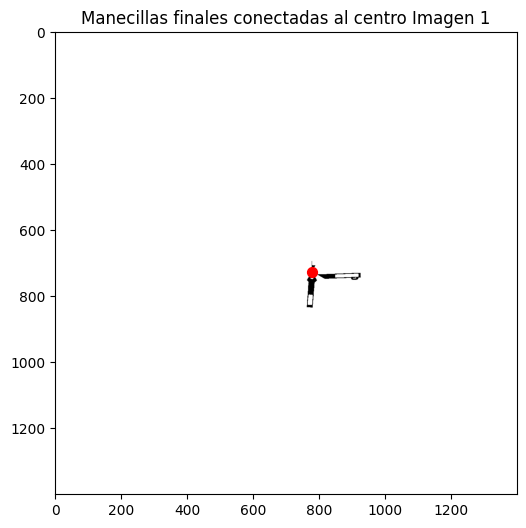

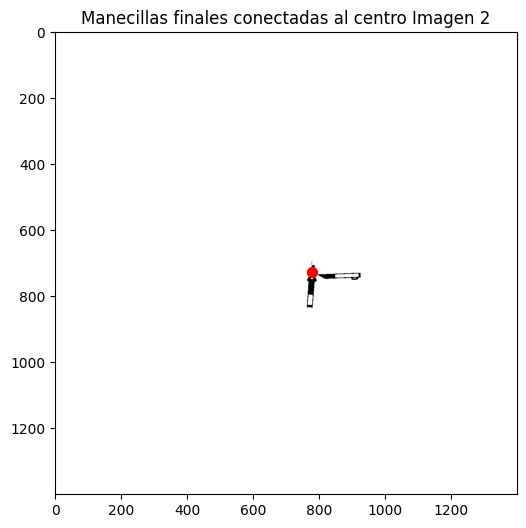

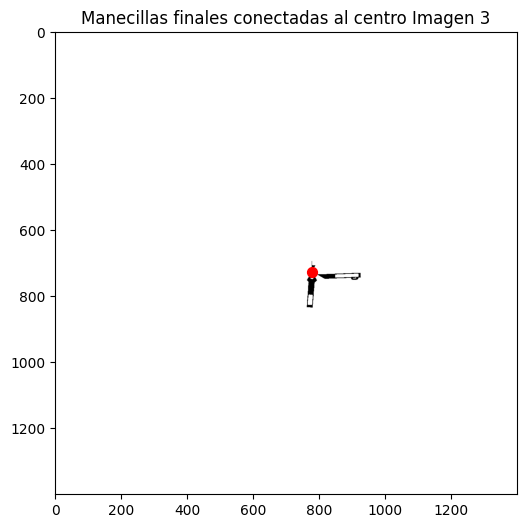

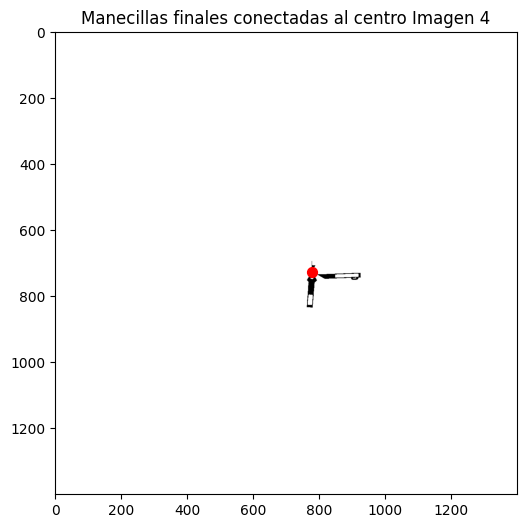

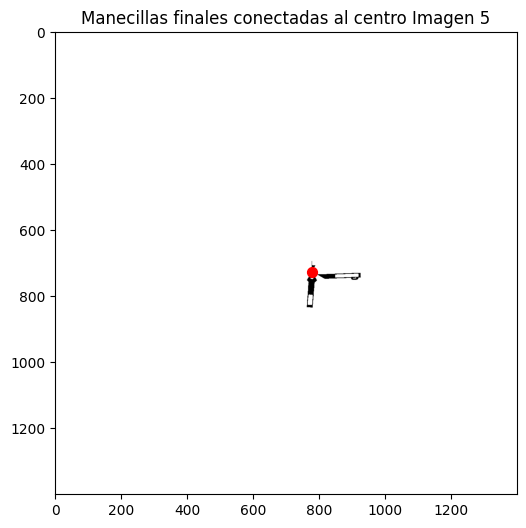

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Programa principal: eliminar pixeles no conectados al centro ----
for i in range(1,6):
    (N, M) = X_limpia.shape

    # Se asume que 'manecillas_limpias' ya está disponible desde el código anterior
    # i_centro, j_centro

    # Crear máscara final
    manecillas_final = np.ones((N,M), np.uint8)*255  # fondo blanco

    # Flood fill desde el centro
    visited = np.zeros((N,M), np.bool_)
    stack = [(i_centro, j_centro)]

    while stack:
        r, c = stack.pop()
        if 0 <= r < N and 0 <= c < M:
            if not visited[r,c] and manecillas_limpias[r,c] == 0:
                visited[r,c] = True
                manecillas_final[r,c] = 0
                stack.extend([(r-1,c),(r+1,c),(r,c-1),(r,c+1)])

    # Mostrar resultado
    plt.figure(figsize=(6,6))
    plt.imshow(manecillas_final, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50, label='Centro')
    plt.title(f'Manecillas finales conectadas al centro Imagen {i}')
    plt.show()

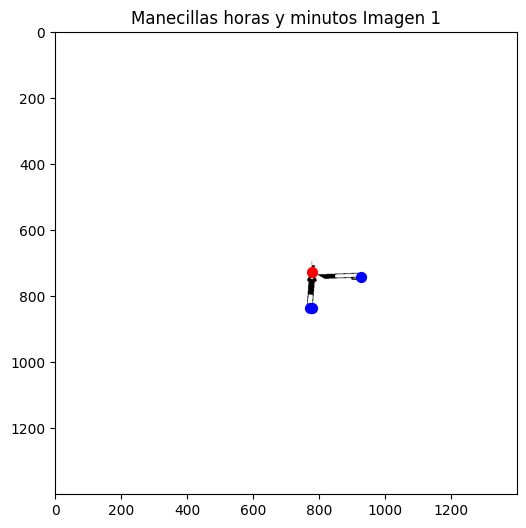

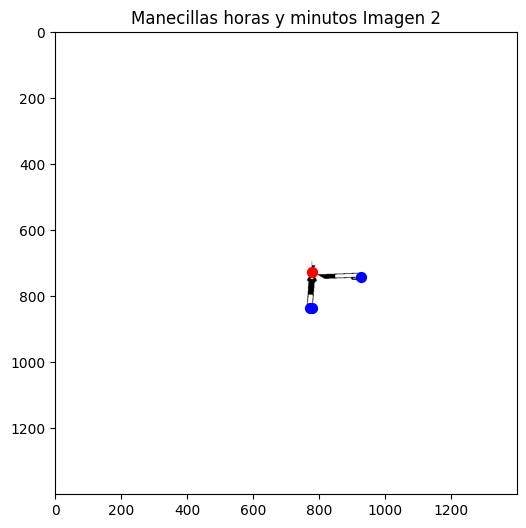

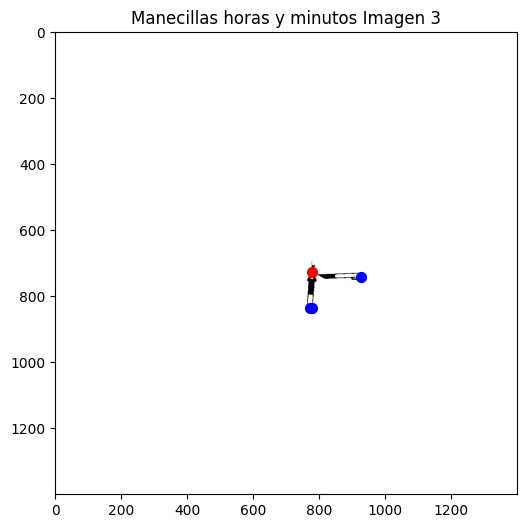

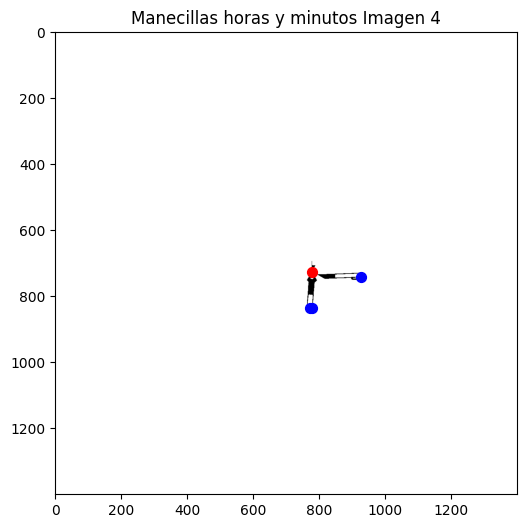

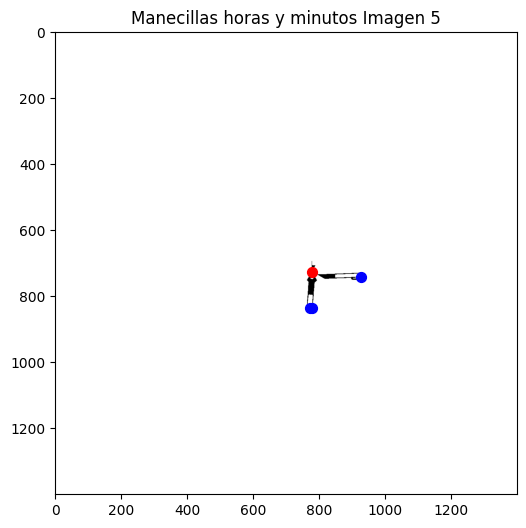

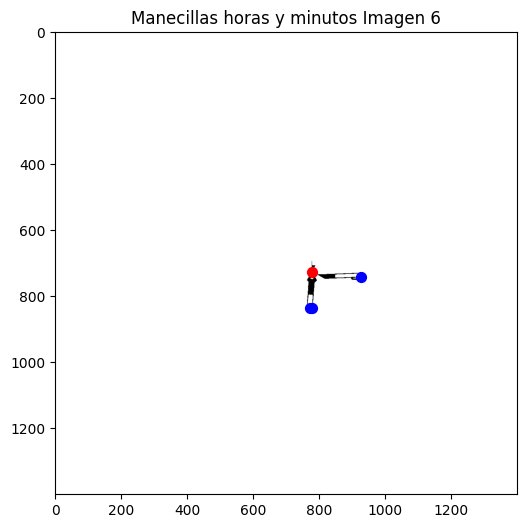

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Programa principal: extremos de manecillas (sin segundos) ----
for i in range(1,7):  # ahora son 6 imágenes
    (N, M) = X_limpia.shape

    # Se asume que 'manecillas_final' ya está disponible desde el código anterior
    # i_centro, j_centro

    filas, cols = np.where(manecillas_final == 0)

    # Calcular distancia al centro
    distancias = np.sqrt((filas - i_centro)**2 + (cols - j_centro)**2)

    # Agrupar píxeles por dirección usando ángulo relativo al centro
    r_rel = filas - i_centro
    c_rel = cols - j_centro
    angulos = np.arctan2(r_rel, c_rel)

    num_grupos = 12  # aproximación de líneas radiales
    grupo_idx = ((angulos + np.pi) / (2*np.pi) * num_grupos).astype(int)

    extremos = []
    longitudes = []
    for g in range(num_grupos):
        comp = np.array([filas[grupo_idx==g], cols[grupo_idx==g]]).T
        if len(comp) == 0:
            continue
        # El extremo será el píxel más lejano al centro
        dist_comp = np.sqrt((comp[:,0]-i_centro)**2 + (comp[:,1]-j_centro)**2)
        idx_extremo = np.argmax(dist_comp)
        extremos.append((comp[idx_extremo,0], comp[idx_extremo,1]))
        longitudes.append(dist_comp[idx_extremo])

    # Eliminar la manecilla más corta (segundos)
    if len(longitudes) > 2:
        idx_min = np.argmin(longitudes)
        del extremos[idx_min]
        del longitudes[idx_min]

    # Mostrar resultados
    plt.figure(figsize=(6,6))
    plt.imshow(manecillas_final, cmap='gray')
    plt.scatter([j_centro], [i_centro], c='red', s=50, label='Centro')

    for ext in extremos:
        plt.scatter(ext[1], ext[0], c='blue', s=50)

    plt.title(f'Manecillas horas y minutos Imagen {i}')
    plt.show()

